#  REGRESSION LOGISTIQUE

## introduction

Dans cet exercice guidé nous allons pratiquer la régression logistique sous Python via les packages « statsmodels » et « scikit-learn ».
  nous tâcherons de décrire les différentes étapes de la construction du modèle à son évaluation et la mesure de ses performances prédictives.

## Utilisation du package scikit-learn

## Import des librairies

Pour commencer nous allons utiliser uniquement le packages scikit-learn
hormis les librairies classiques importez celle utilisée pour la regression logistique et celles pour les métriques necessaires (matrice de confusion, rapport des métriques)



In [121]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import numpy as np

## Import du dataset

Nous analysons dans cet exercice les facteurs de risque d'infidélité dans les ménages. NOus verrons que le facteur temps est bien évidemment un paramètre qui joue en faveur de l'infidélité. Mais pas seulement, d'autres variables également.

In [122]:
#importez votre dataset
df = pd.read_excel("dataset_infidelites.xlsx",)

df.head(10)

,Sex,Age,YearsMarried,Children,Religious,Education,Occupation,RatingMarriage,Infidelite
0,0,22.0,0.75,0,2,18,6,5,0
1,0,32.0,15.00,1,3,14,1,2,1
2,1,27.0,4.00,1,4,20,5,5,0
3,0,22.0,1.50,0,2,16,4,5,0
4,0,27.0,7.00,1,3,14,1,4,0
5,0,22.0,1.50,1,5,14,5,3,1
6,0,17.5,0.75,0,5,14,4,5,1
7,0,42.0,15.00,1,4,14,1,2,1
8,0,22.0,4.00,1,3,16,1,3,1
9,0,32.0,10.00,1,3,14,1,5,0


## descrivez et visualisez votre dataset

# 1. Exploratory Data Analysis

## Objectif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation 

## Checklist de base
#### Analyse de Forme :
- **variable target** : Infidelity
- **lignes et colonnes** : (601, 9)
- **types de variables** : qualitatives : 7, quantitatives : 2 (besoin d'une description de la source)
- **Analyse des valeurs manquantes** :
   Aucune 

#### Analyse de Fond :
- **Visualisation de la target** :
  Fidele    451/601
  Infidele  150//601
    
    
    
- **Signification des variables** :
    -  Les differentes variables explicative semble représenter differente echelle de niveau sauf pour certaine valeur et des booleans pour d'autre l'age et les années de mariage
    - la colonne religious semble representer un niveau de foi à verifier 



- **Relation Variables / Target** :
    La qualité du mariage semble être la valeur qui a le plus d'incidence sur notre target infidelite
    
    
    
## Analyse plus détaillée

- **Relation Variables / Variables** :
    - Il y a une forte correlation entre l'age et les années de mariage ce qui semble logique une fusion des deux colonnes peut etre envisagé




### hypotheses nulle : 


  - les données ne semble pas assez riche pour le modele de regression 
    

In [123]:
#décrivez rapidement votre jeu de données
# print(df.describe())
print(df.info())

print(df.shape)

df.describe()
#Réalisez une brève analyse exploratoire
# en affichant la matrice de correlation
# en visualisant les variables les plus pertinentes
# A premières vues , qu'en déduisez vous ? 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             601 non-null    int64  
 1   Age             601 non-null    float64
 2   YearsMarried    601 non-null    float64
 3   Children        601 non-null    int64  
 4   Religious       601 non-null    int64  
 5   Education       601 non-null    int64  
 6   Occupation      601 non-null    int64  
 7   RatingMarriage  601 non-null    int64  
 8   Infidelite      601 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.4 KB
None
(601, 9)


,Sex,Age,YearsMarried,Children,Religious,Education,Occupation,RatingMarriage,Infidelite
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,0.475874,32.487521,8.177696,0.715474,3.116473,16.166389,4.194676,3.931780,0.249584
std,0.499834,9.288762,5.571303,0.451564,1.167509,2.402555,1.819443,1.103179,0.433133
min,0.000000,17.500000,0.125000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,0.000000,27.000000,4.000000,0.000000,2.000000,14.000000,3.000000,3.000000,0.000000
50%,0.000000,32.000000,7.000000,1.000000,3.000000,16.000000,5.000000,4.000000,0.000000
75%,1.000000,37.000000,15.000000,1.000000,4.000000,18.000000,6.000000,5.000000,0.000000
max,1.000000,57.000000,15.000000,1.000000,5.000000,20.000000,7.000000,5.000000,1.000000


Notre dataset a une shape de 601 lignes pour 9 colonnes :  
 - Sex               
 - Age             
 - YearsMarried    
 - Children          
 - Religious          
 - Education          
 - Occupation          
 - RatingMarriage     
 - Infidelite         

Notre colonne target est la colonne infidelite contenant des valeurs binaire, 1 si l'individu est infidele et 0 si il ne l'est pas.




## Proportion des classes target dans le dataset

In [124]:
df.Infidelite.value_counts(normalize=True)

0    0.750416
1    0.249584
Name: Infidelite, dtype: float64

In [125]:
infidele= df[df['Infidelite']==1]



In [126]:
fidele= df[df['Infidelite']==0]

In [1]:
for col in df:
    plt.figure()
    sns.histplot(infidele[col], color="red", label="infidele", kde=True, stat="density", linewidth=0)
    sns.histplot(fidele[col], color="blue", label="fidele", kde=True, stat="density", linewidth=0)
    plt.legend()
 

NameError: name 'df' is not defined

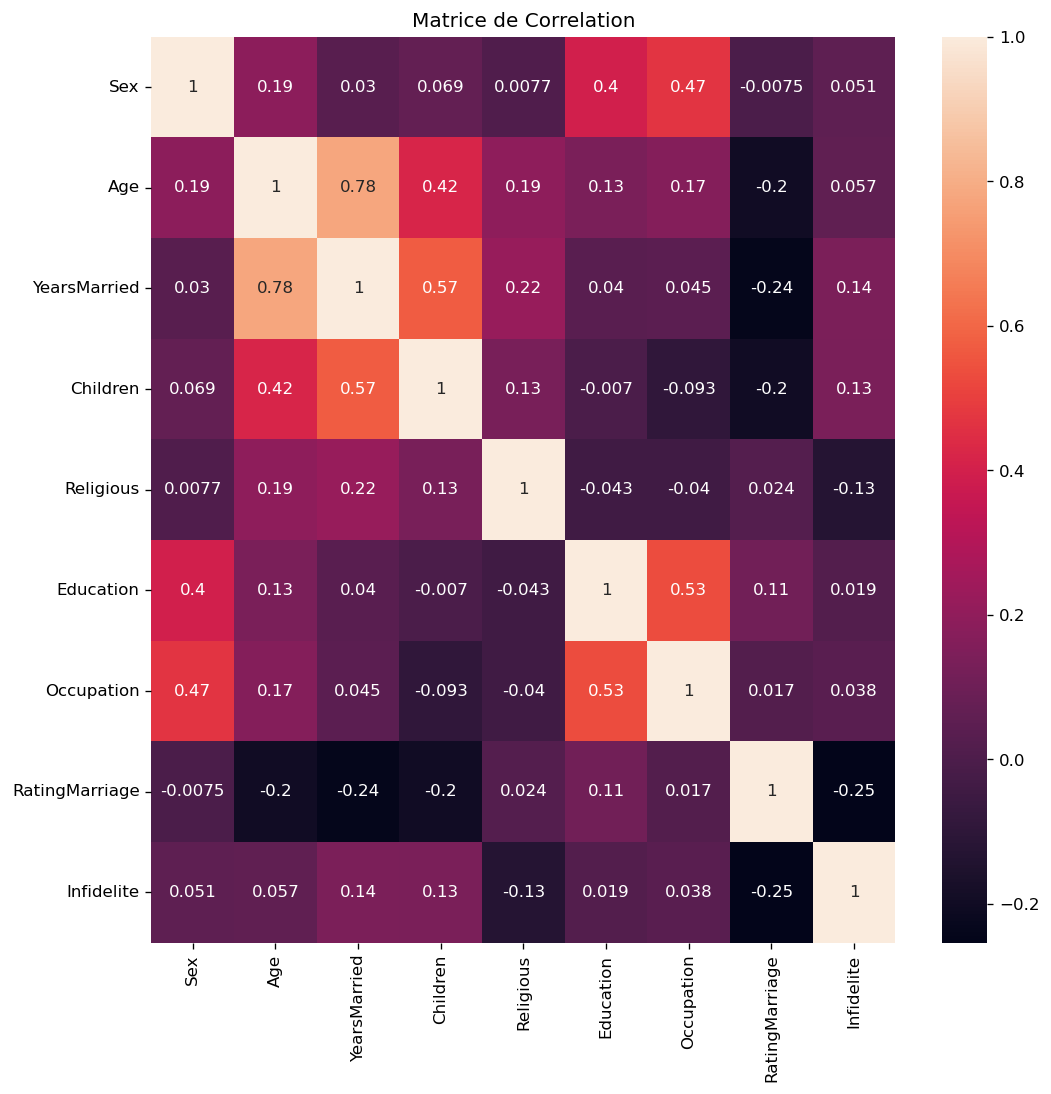

In [129]:

corr_df = df.corr()
plt.figure(figsize=(10,10),dpi=120)
plt.title("Matrice de Correlation")
sns.heatmap(corr_df, annot=True)
plt.show()

In [130]:
df.shape

(601, 9)

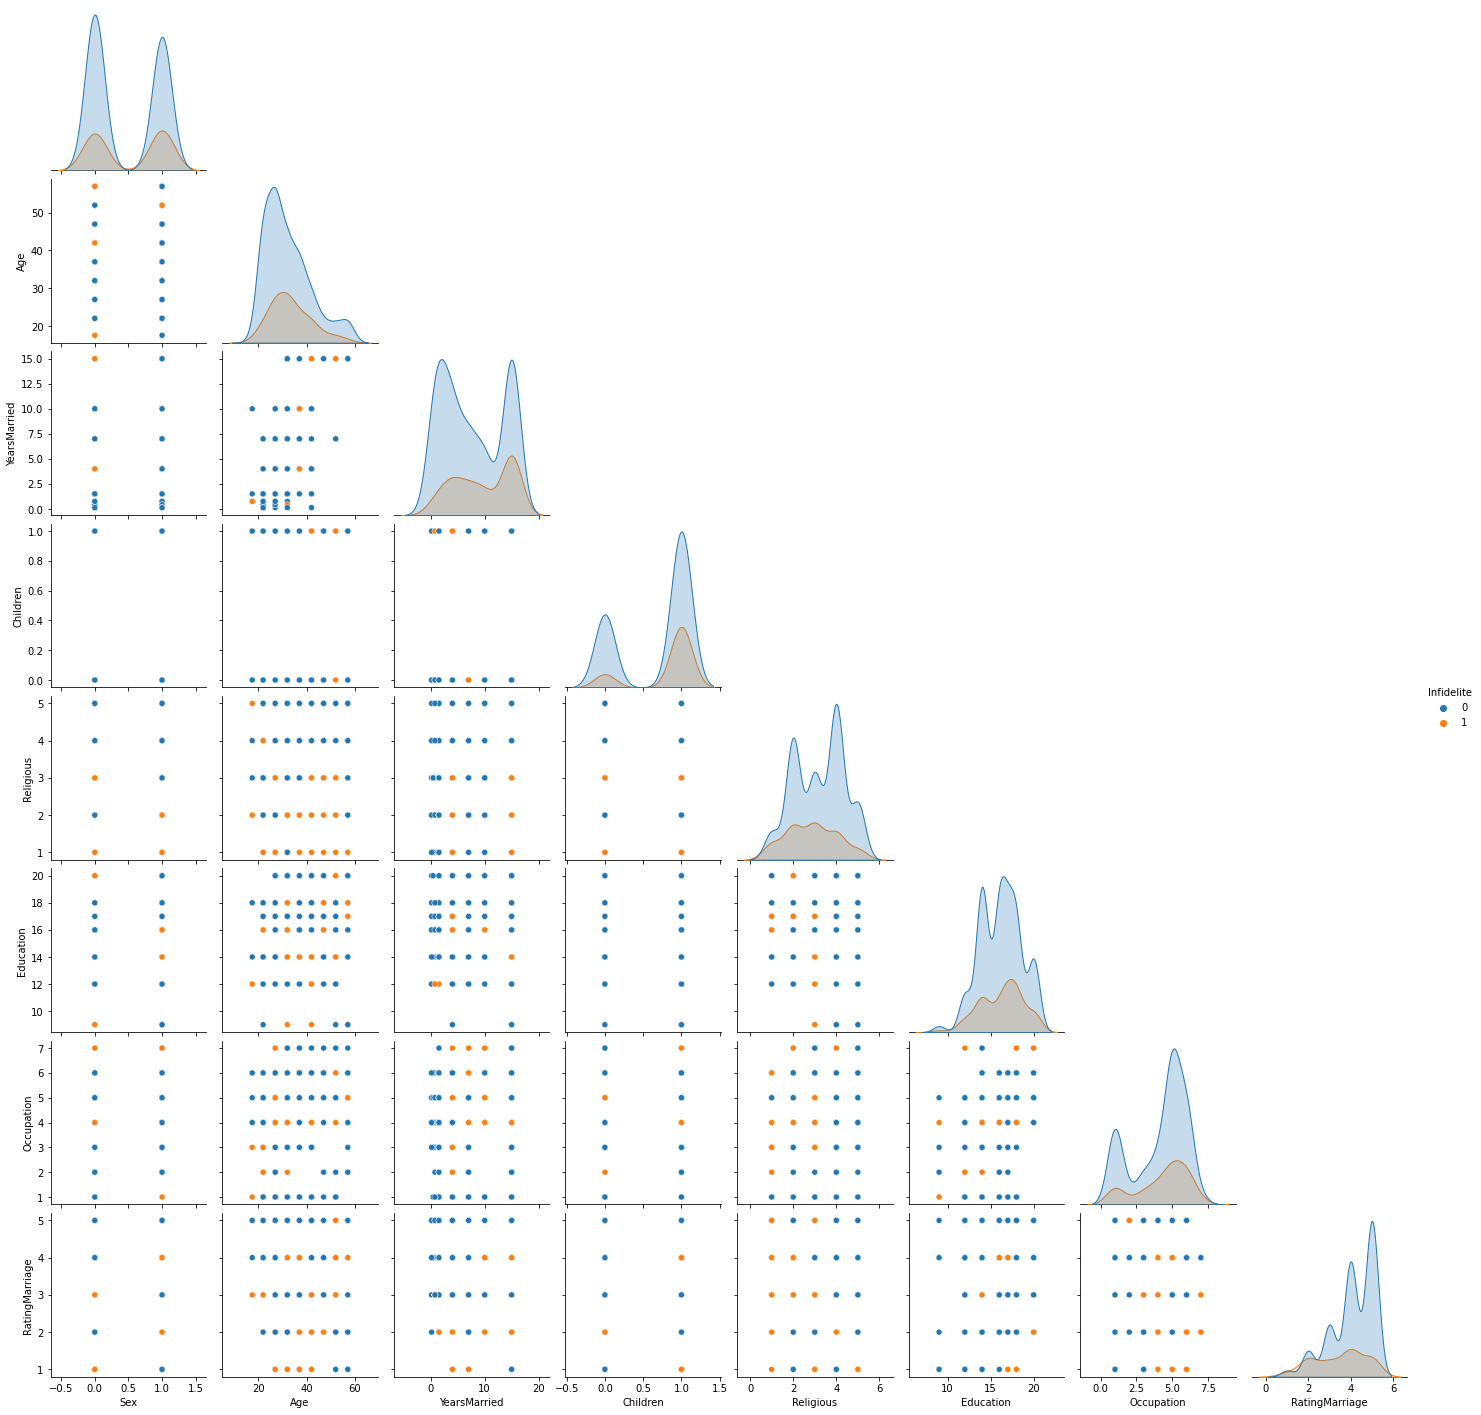

In [131]:

sns.pairplot(df,hue='Infidelite',kind='scatter',corner=True)

## Séparez votre dataset en Train set et Test set

In [132]:
#définissez tout d'abord vos variables : indépendantes/ dependante



In [133]:
# vérifiez le nombre de données y dans chaque jeu (train et test)
X = df.drop("Infidelite", axis=1)
y=df["Infidelite"]

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,test_size=0.25,stratify=y)

## Entrainez la regression logistique sur votre train set

In [134]:
#Nous instancions une régression logistique sans pénalité c.-à-d. sans réaliser de régularisation pour l'instant
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [135]:
from sklearn.metrics import classification_report
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.96      0.85       113
           1       0.56      0.13      0.21        38

    accuracy                           0.75       151
   macro avg       0.66      0.55      0.53       151
weighted avg       0.71      0.75      0.69       151



In [136]:

cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[109,   4],
       [ 33,   5]])

Que se passe t - il ? 
le processus n’a pas convergé alors que le nombre maximal d’itération par défaut est (max_iter = 100).(voir doc)

« Scikit-learn » nous propose alors de : 
- soit augmenter le nombre d’itérations (mais trop de puissance de calcul pour un résultat incertain),
- soit de standardiser les données avant de lancer l’algorithme
La documentation de la régression logistique sous « scikit-learn » nous indique les différents algorithmes d’optimisation qu’il est susceptible d’utiliser (option « solver »)
Ces approches sont sensibles aux différences d’échelles entre les variables, d’où l’indication « scale the data » dans le
« warning » envoyé par la méthode fit()

### Standardisation des données

La doc de la régression logistique sous « scikit-learn » nous indique les différents
algorithmes d’optimisation qu’il est susceptible d’utiliser (option « solver »).
Ces approches sont
sensibles aux différences d’échelles entre les variables, d’où l’indication « scale the data » dans le
« warning » envoyé par la méthode fit().

Nous allons donc centrer et réduire nos données avant de relancer le modèle

In [137]:
#importation de la bibliothèque necessaire à la standardisation
from sklearn import preprocessing
import scipy as sci
#instanciationm
scaler_STD = preprocessing.StandardScaler()

Xs=scaler_STD.fit_transform(X)



Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, y,random_state=1,test_size=0.25,stratify=y)


#transformation

# imprimer les statistiques de descriptions

#remarquez que les variables sont bien de moyenne nulle et d’écart-type unitaire.

In [138]:
Xs=pd.DataFrame(Xs)
Xs.describe()

,0,1,2,3,4,5,6,7
count,6.010000e+02,6.010000e+02,6.010000e+02,6.010000e+02,6.010000e+02,6.010000e+02,6.010000e+02,6.010000e+02
mean,-8.238926e-17,3.310349e-16,4.433503e-17,-2.955669e-17,8.275872e-17,4.729070e-17,1.004927e-16,-9.458140e-17
std,1.000833e+00,1.000833e+00,1.000833e+00,1.000833e+00,1.000833e+00,1.000833e+00,1.000833e+00,1.000833e+00
min,-9.528570e-01,-1.614855e+00,-1.446592e+00,-1.585755e+00,-1.814320e+00,-2.985305e+00,-1.757317e+00,-2.659787e+00
25%,-9.528570e-01,-5.912620e-01,-7.504843e-01,-1.585755e+00,-9.570823e-01,-9.024536e-01,-6.571632e-01,-8.453353e-01
50%,-9.528570e-01,-5.252873e-02,-2.115621e-01,6.306143e-01,-9.984465e-02,-6.931287e-02,4.429902e-01,6.189062e-02
75%,1.049475e+00,4.862045e-01,1.225564e+00,6.306143e-01,7.573930e-01,7.638278e-01,9.930669e-01,9.691165e-01
max,1.049475e+00,2.641138e+00,1.225564e+00,6.306143e-01,1.614631e+00,1.596969e+00,1.543144e+00,9.691165e-01


In [139]:
#quelles sont les valeurs que peuvent prendre y ? essayer avec attribute_classes



### relancez votre modèle

In [140]:
clf.fit(Xs_train,ys_train)
print(clf.coef_)
clf.coef_[0]

[[ 0.05631017 -0.21480604  0.33525087  0.13662509 -0.3273311   0.10482022
   0.0920115  -0.53916101]]


array([ 0.05631017, -0.21480604,  0.33525087,  0.13662509, -0.3273311 ,
        0.10482022,  0.0920115 , -0.53916101])

In [141]:
# relancez le modèle avec les nouvelles valeurs standardisées

#affichez les coefficients
scaler_STD.scale_

array([0.49941757, 9.28103073, 5.56666619, 0.45118828, 1.16653769,
       2.40055494, 1.81792835, 1.10226132])

### Dé-standardisation des coefficients

ATTENTION ! nous travaillons sur des données transformées. Nous devons les « dé-standardiser » en les divisant par les écarts-type des variables.


In [142]:
#correction des coefficients -
#  dé-standardisationpar les écarts-type utilisés lors de la standardisation des variables

coefUnstd = clf.coef_[0] / scaler_STD.scale_
coefUnstd

#affichage des coefficients corrigés


array([ 0.11275169, -0.02314463,  0.06022471,  0.30281169, -0.28060054,
        0.043665  ,  0.05061338, -0.48914082])

In [143]:
# on fait de même pour la constante (l'ordonnée à l'origine)
interceptUnStd =clf.intercept_ + np.sum(clf.coef_[0]*(-scaler_STD.mean_/scaler_STD.scale_))
print(interceptUnStd)


[0.63469439]


## Faites des prédictions des résultats du train set

In [144]:
# calcul des probabilités d'affectation

# on affiche les 5 premières valeurs prédites

y_p_pred=clf.predict_proba(Xs_test)
y_p_pred[:5]

array([[0.77135348, 0.22864652],
       [0.73199927, 0.26800073],
       [0.85446143, 0.14553857],
       [0.91982805, 0.08017195],
       [0.92778171, 0.07221829]])

On observe 2 colonnes : la première correspond au proba d'appartenir à Y=0 et la seconde à Y=1

In [145]:
#et on les compare au
## x valeurs attendues
np.c_[y_pred,ys_test]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [0,

## Faites des prédictions des résultats du test set

In [146]:
# nous devons appliquer la même standardisation sur les valeurs du test set ! 

#transformation de l'échantillon test


#stat. descriptives
#print(sci.stats.describe(X1_test,axis=0,ddof=0))

# on applique le modèle à l'échantillon




## Evaluez les performances du modèle à l'aide de la matrice de confusion 

<AxesSubplot:>

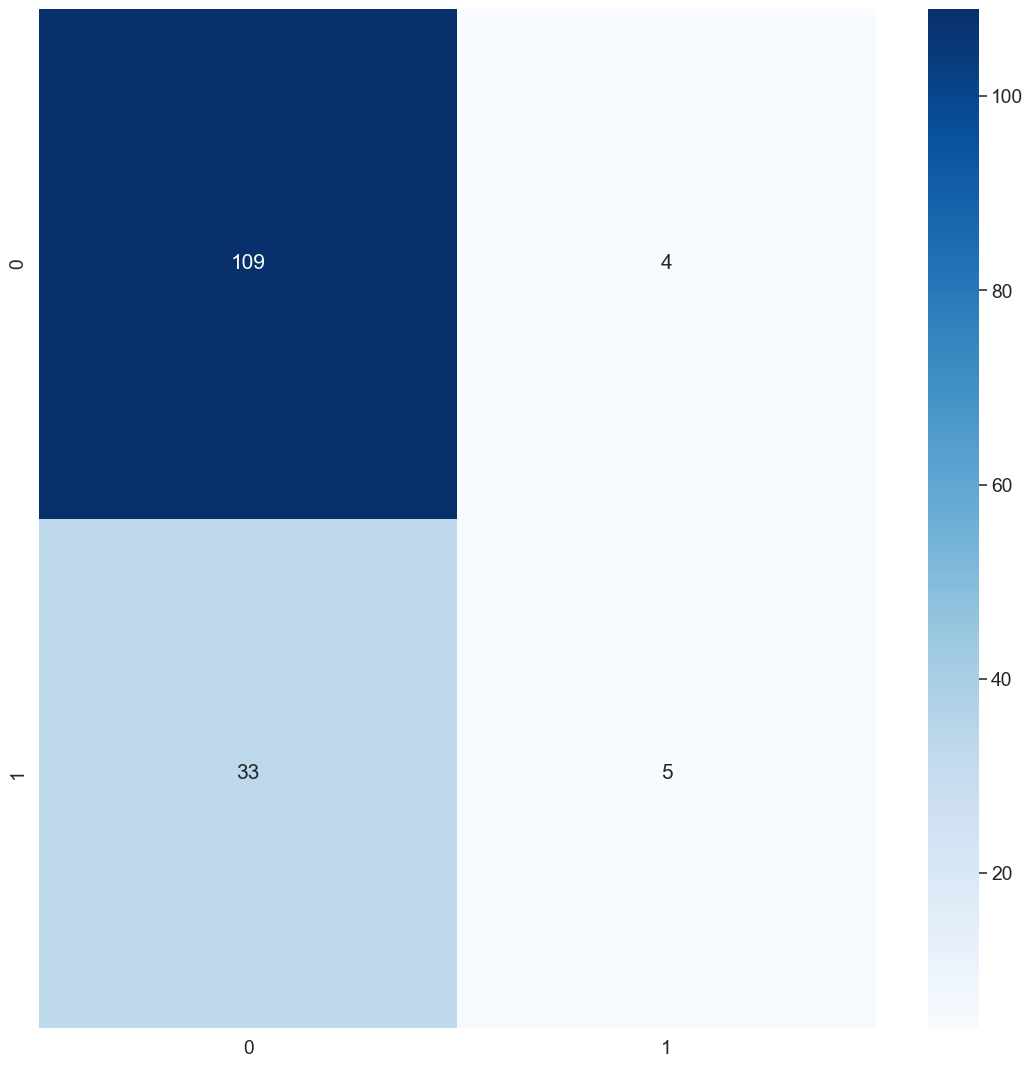

In [166]:
# affichez la matrice de confusion
cm = confusion_matrix(ys_test, y_pred)
plt.figure(figsize=(15,15),dpi=90)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,fmt='g', cmap='Blues')


- Combien y a t-il de faux positifs ? combien de faux négatifs ?
    Il y a 37 faux positifs
- Combien d'éléments sont bien classés? 
- représentez la matrice de confusion sous la forme d'une heatmap

In [148]:
#affichez le taux d'erreur


In [149]:
#affichez le rapport de classification

print(f"standardisation : \n{classification_report(ys_test, y_pred)}")

standardisation : 
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       113
           1       0.56      0.13      0.21        38

    accuracy                           0.75       151
   macro avg       0.66      0.55      0.53       151
weighted avg       0.71      0.75      0.69       151



# Utilisons Maintenant Stats.models

## import des librairies

In [150]:
#importez la librairie adéquate
import numpy as np
import statsmodels.api as sm
from statsmodels.api import Logit

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



## Preparez votre dataset

In [151]:
#attention StatsModels ne prend pas en compte l'ordonnée àl'origine 𝑏₀! 
# vous devez inclure la colonne supplémentaire de "1" dans x. 
#faites cela avec add_constant ():

from statsmodels.tools import add_constant

#données X avec la constante

#vérifier la structure, vous devez bien avoir une colonne en plus



## Entrainez votre modèle

In [152]:
# Créez votre modèle de régression logistique 

#lancez les calculs


In [153]:
#pour accéder aux valeurs des coefficients, utilisez .params
#Obtenez vous les même résulats que précedemment? 


In [154]:
# affichez le rapport des metriques avec stat.model. Il est possible d'utiliser .summary() soit .summary2()
#pour plus d'infos : https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.LogitResults.html

## Faites des prédictions des résultats du test set

In [155]:
#affichez les probabilités de prédiction


In [156]:
#utilisez les pour afficher les valeurs de y en ayant établi un seuil à 0.5


## Evaluez les performances du modèle à l'aide de la matrice de confusion

In [157]:
#obtenez la matrice de confusion avec crosstable


In [158]:
#calculez également le taux de reconnaissance et le taux d'erreur  : (taux d'erreur = 1- taux de reconnaissance)


#taux d'erreur


Obtenez vous bien les même résultats que précédement ?

## Evaluez les performances du modèle à l'aide du diagramme de fiabilité


Le diagramme de fiabilité est un outil de diagnostic graphique. Il oppose les proba d'affectation à la valeur "Y=1" estimés par le modèle(appelés scores)  aux affectations observées. S’ils forment une droite, nous pouvons considérer que la modélisation est
pertinente car le modèle arrive à approcher de manière satisfaisante l’appartenance aux classes des
individus.

Voici les principales étapes de la construction du diagramme de fiabilité :
1. Appliquer le classifier sur les données pour obtenir le score.
2. Trier le fichier selon le score croissant.
3. Sur la base du score, subdiviser les données en intervalles (ex. 0.0-0.2, 0.2-0.4, etc.).
4. Dans chaque intervalle, calculer la proportion de positifs.
5. Dans le même temps, toujours dans chaque intervalle, calculer la moyenne des scores.
6. Si les chiffres concordent dans chaque intervalle, les scores sont bien calibrés, le classifieur est de bonne qualité.
7. Nous pouvons résumer l'information dans un graphique nuage de points appelé diagramme de fiabilité, avec en abcisse la moyenne des scores, en ordonnée la proportion de "positifs".
8. Si les scores sont bien calibrés, les points devraient être alignés sur une droite, la première bissectrice.
9. Les points s'écartant sensiblement de la première bissectrice doivent attirer notre attention

In [159]:
# on cré un tableau temporaire avec les valeurs de y observées et les scores


In [160]:
# on sépare les scores en 5 intervalles de largeur égales

#et on les intègre dans le df



In [161]:
# on calcule la moyenne des scores dans chaque groupe à l'aide de pivot_table


In [162]:
# puis la moyenne des y observés



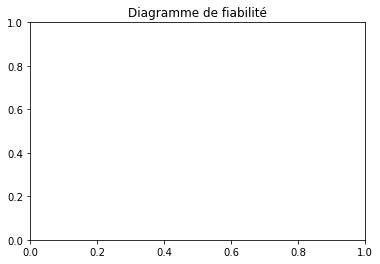

In [163]:
# on construit le diagramme 
#en faisant apparaitre la diagonale

#et en ajoutant notre diagramme

#titre
plt.title("Diagramme de fiabilité")
#tracé
plt.show()


les points sont tout de même éloignés de la bissectrice, le modèle peut être amélioré

## Evaluez les performances du modèle à l'aide de la courbe ROC

Pour évaluer un modèle le taux d’erreur semble être un indicateur synthétique pertinent, il indique (estime) la probabilité de mal classer un individu de la population.
Les autres indicateurs sont très intéressants également (sensibilité/rappel,précision/spécificité) mais obligent à surveiller plusieurs valeurs simultanément.

Mais lorsque les classes sont très déséquilibrées, la matrice de confusion et surtout le
taux d’erreur donnent souvent une fausse idée de la qualité de l’apprentissage. Doù l'intérêt de la courbe ROC!
les résultats qu'elle fournit sont valables même si l'échantillon n'est pas représentatif

cas du modèle qui ne fait pas mieux que l’affectation des probabilités
- notre courbe ne doit pas passer en dessous
- plus il s’en écarte vers le haut, mieux c’est

In [164]:
# on utilise roc_curve (scikit- learn )
# on trace la diagonale de référence
#fpr (false positive rate -- taux de faux positifs) en abscisse
#tpr (true positive rate – taux de vrais positifs) en ordonnée
#pos_label = 1 pour indiquer la modalité cible


In [165]:
# on calcule l'aire sous la courbe en faisant appel à la fonction roc_auc_score()


## Ajustez votre modèle

## Selection des variables au regard de leur significativité : approche statistique 

### Via le test du rapport de vraisemblance